In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline


In [6]:
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Plotting**

<AxesSubplot:xlabel='age', ylabel='chol'>

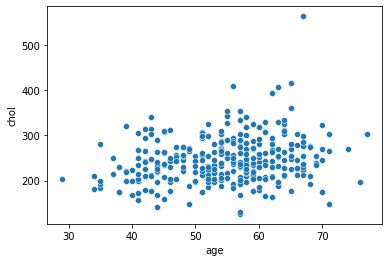

In [8]:
sns.scatterplot(x='age',y='chol',data=df)

<AxesSubplot:xlabel='cp', ylabel='age'>

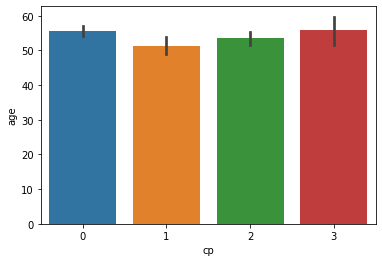

In [9]:
sns.barplot(x='cp',y='age',data=df)

<AxesSubplot:xlabel='output', ylabel='cp'>

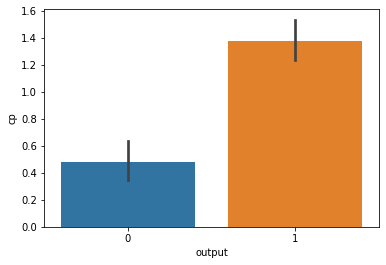

In [12]:
sns.barplot(x='output',y='cp',data=df)

**Train Test Split**

In [13]:
x = df.drop(['output'],axis=1)
y = df['output']

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

Logistic Regression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
lr.score(xtest,ytest)

0.8852459016393442

In [19]:
yp = lr.predict(xtest)

In [20]:
c = confusion_matrix(ytest,yp)

<AxesSubplot:>

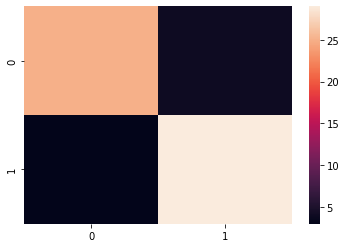

In [22]:
sns.heatmap(c)

**SVC**

In [23]:
sv = SVC()

In [24]:
sv.fit(xtrain,ytrain)

SVC()

In [25]:
sv.score(xtest,ytest)

0.8688524590163934

Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200)

In [27]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [28]:
rfc.score(xtest,ytest)

0.8688524590163934

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
rfm = cross_val_score(rfc,X=xtrain,y=ytrain,cv=10)

In [31]:
rfm.mean()

0.8181666666666668

K nearest Neighbour

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kn = KNeighborsClassifier(n_neighbors=5)

In [34]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [39]:
kn.score(xtest,ytest)

90.1639344262295

In [36]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [38]:
a = [[29,1,0,120,190,0,1,130,1,1.3,0,0,0]]
kn.predict(a)

array([1])